In [17]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier


In [130]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_price_range = train['price_range']
train.drop(['price_range'],axis=1,inplace=True)

test_ids = test['id']
test.drop(['id'],axis=1,inplace=True)

In [116]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


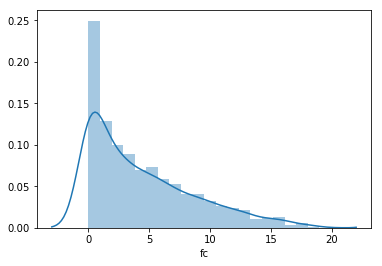

In [131]:
sns.distplot(train['fc'])
train['has_front_cam'] = train['fc'].map(lambda x: 1 if x > 0 else 0)
test['has_front_cam'] = test['fc'].map(lambda x: 1 if x > 0 else 0)

#train['has_back_cam'] = train['pc'].map(lambda x: 1 if x > 0 else 0)
#test['has_back_cam'] = test['pc'].map(lambda x: 1 if x > 0 else 0)

#train['sc_area'] = train['sc_h']*train['sc_h']
#test['sc_area'] = test['sc_h']*test['sc_h']

train['pc'] = train['pc'].map(lambda x: x//3)
test['pc'] = test['pc'].map(lambda x: x//3)

#train['fc'] = train['fc'].map(lambda x: x//2)
#test['fc'] = test['fc'].map(lambda x: x//2)


In [132]:
n_train = train.shape[0]
n_test = train.shape[0]
NFOLDS = 5
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((n_train,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train.iloc[train_index]
        y_tr = y_train.iloc[train_index]
        x_te = x_train.iloc[test_index]

        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train, oof_test.astype(np.uint8)


In [133]:
clf = SVC(kernel='linear',C=0.025)
oof_train, oof_test = get_oof(clf,train,train_price_range,test)
accuracy_score(oof_train,train_price_range)

0.97650000000000003

In [110]:
predictions = clf.predict(test)
StackingSubmission = pd.DataFrame({ 'id': test_ids,
                            'price_range': oof_test})
StackingSubmission.to_csv("Avishkar.csv", index=False)